# Lithium prescribing trends in England. 

## **Background and Rationale**
For over 60 years lithium has been the gold standard for the treatment and prevention of relapse in bipolar disorder.  In recent years, published literature has confirmed the superiority of lithium in this field, including two meta-analysis of RCTs (Severus et al. 2014, Miura et al. 2014) and one of observational studies (Kessing et al 2018).  Yet in various countries, authors have described a decline in lithium use (Karanti et al. 2016), including in the UK (Hayes et al. 2011, Lyall et al. 2019) 

We wish to describe long term lithium prescribing trends in England.  Previous authors have reported regional variations in lithium use across the country (POMH Lithium report, 2008). We would like to explore these national variations in use, to further understand trends in lithium prescribing in the UK. 

## **Proposed project**
### Title:  
Lithium prescribing trends
### Description:  
* Total number of items of lithium carbonate and lithium citrate dispensed per year from 1995 to 2018
* Total number of non-GP v GP items of lithium carbonate and lithium citrate dispensed per year
* Number of items of lithium carbonate per 1000 patient population for each CCG
* Number of items of lithium citrate per 1000 patient population for each CCG
* Number of items of non-GP v GP prescriptions for lithium carbonate for each region
* Number of items of non-GP v GP prescriptions for lithium citrate for each region



In [5]:
#import libraries required for analysis
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from matplotlib.dates import DateFormatter
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps
import matplotlib.gridspec as gridspec

In [28]:
sql = """
WITH
bnf_tab AS (
SELECT
DISTINCT chemical,
chemical_code
FROM
ebmdatalab.hscic.bnf )
SELECT
rx.month,
rx.practice,
rx.pct,
SUBSTR(rx.bnf_code,1,9) AS chemical_code,
chemical,
sum(IF(rx.bnf_code LIKE "0402030K0%", items,0)) AS carbonate,
sum(IF(rx.bnf_code LIKE "0402030P0%", items,0)) AS citrate,
sum(items) AS total_lithium,
sum(actual_cost) AS total_cost
FROM
hscic.normalised_prescribing_standard AS rx
LEFT JOIN
bnf_tab
ON
chemical_code =SUBSTR(rx.bnf_code,1,9)
JOIN
hscic.practices AS prac
ON
rx.practice = prac.code 
JOIN
  hscic.ccgs AS ccgs
ON
rx.pct=ccgs.code
WHERE
  prac.setting = 4
  AND (bnf_code LIKE "0402030K0%" OR ##carbonate
  bnf_code LIKE "0402030P0%") ##citrate
  AND
ccgs.org_type='CCG'
GROUP BY
rx.month,
rx.practice,
rx.pct,
chemical_code,
chemical
ORDER BY
month"""

df_lithium = bq.cached_read(sql, csv_path='lithium.csv')

In [97]:
df_lithium['month'] = df_lithium['month'].astype('datetime64[ns]')
df_lithium.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
0,2010-08-01,E83027,07M,0402030K0,Lithium Carbonate,11,0,11,13.55
1,2010-08-01,M85007,15E,0402030K0,Lithium Carbonate,9,0,9,8.07
2,2010-08-01,K82037,14Y,0402030K0,Lithium Carbonate,18,0,18,17.85
3,2010-08-01,P89026,01Y,0402030K0,Lithium Carbonate,18,0,18,12.97
4,2010-08-01,C82055,03W,0402030K0,Lithium Carbonate,12,0,12,18.98


In [20]:
df_lithium["chemical"].unique()#shows me the unique values within the chemical column

array(['Lithium Citrate', 'Lithium Carbonate'], dtype=object)

In [59]:
df_lithium.nunique()

month               110
practice           8022
pct                 191
chemical_code         2
chemical              2
carbonate           136
citrate              35
total_lithium       135
total_cost       190738
dtype: int64

In [24]:
df_carbonate = df_lithium.loc[df_lithium["chemical"] == "Lithium Carbonate"]
df_carbonate.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
1,2010-08-01,C81095,15M,0402030K0,Lithium Carbonate,13,0,13,17.78
2,2010-08-01,C83023,04Q,0402030K0,Lithium Carbonate,14,0,14,23.63
3,2010-08-01,M87009,05C,0402030K0,Lithium Carbonate,12,0,12,24.61
4,2010-08-01,M92654,06A,0402030K0,Lithium Carbonate,3,0,3,3.28
5,2010-08-01,P84616,14L,0402030K0,Lithium Carbonate,15,0,15,11.30


In [11]:
df_citrate = df_lithium.loc[df_lithium["chemical"] == "Lithium Citrate"]
df_citrate.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
0,2010-08-01,K84002,10Q,0402030P0,Lithium Citrate,0,3,3,27.63
27,2010-08-01,B84006,02T,0402030P0,Lithium Citrate,0,3,3,62.70
70,2010-08-01,B86022,15F,0402030P0,Lithium Citrate,0,7,7,46.72
87,2010-08-01,L82026,11N,0402030P0,Lithium Citrate,0,1,1,2.09
98,2010-08-01,D81021,06H,0402030P0,Lithium Citrate,0,2,2,53.34


In [13]:
ccg_lithium_totalcount = df_lithium_totalcount.groupby(["pct", "month"], as_index=False).sum()
ccg_lithium_totalcount.head()

,pct,month,carbonate,citrate,total_lithium,total_cost,measure_count
0,00C,2010-08-01,329,4,333,285.47,333
1,00C,2010-09-01,354,1,355,257.35,355
2,00C,2010-10-01,315,5,320,282.27,320
3,00C,2010-11-01,302,1,303,238.85,303
4,00C,2010-12-01,325,4,329,275.83,329


### Display total no. of items dispensed per year

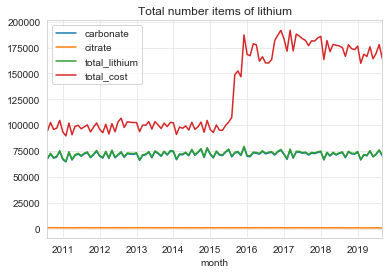

In [116]:
plot1 = df_lithium.groupby("month").sum().plot(kind='line', title="Total number items of lithium")

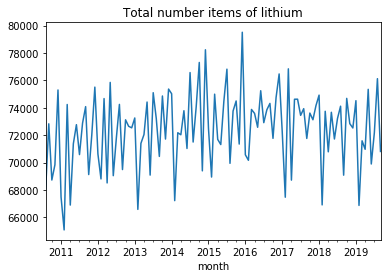

In [46]:
df_lithium.groupby("month")['total_lithium'].sum().plot(kind='line', title="Total number items of lithium")

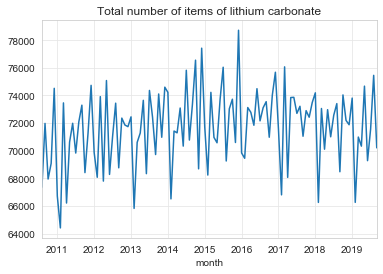

In [102]:
df_lithium.groupby("month")['carbonate'].sum().plot(kind='line', title='Total number of items of lithium carbonate')

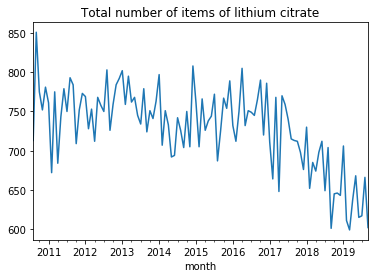

In [49]:
df_lithium.groupby("month")["citrate"].sum().plot(kind='line', title='Total number of items of lithium citrate')

In [60]:
##get list size info
sql2 = """
SELECT month, 
pct_id AS pct,
AVG(total_list_size) AS list_size
FROM ebmdatalab.hscic.practice_statistics
group by 
month, pct
order by
month, pct,
list_size
"""
df_list = bq.cached_read(sql2, csv_path='df_list.csv')
df_list['month'] = df_list['month'].astype('datetime64[ns]')
df_list.head(5)

Downloading: 100%|██████████| 13398/13398 [00:00<00:00, 17829.60rows/s]


,month,pct,list_size
0,2014-10-01,None,0.000000
1,2014-10-01,00C,7616.000000
2,2014-10-01,00D,5662.509804
3,2014-10-01,00F,6102.176471
4,2014-10-01,00G,8058.750000


In [63]:
ccg_lithium_count = df_lithium.groupby(["month", "pct"])["total_lithium"].sum().reset_index()
ccg_lithium_count.head()

,month,pct,total_lithium
0,2010-08-01,00C,333
1,2010-08-01,00D,496
2,2010-08-01,00J,456
3,2010-08-01,00K,295
4,2010-08-01,00L,595


In [104]:
#merge dataframes to show items per 1000

df_lithium_per1000 = pd.merge(ccg_lithium_count, df_list, on=['month', 'pct'])
df_lithium_per1000['items_per_1000'] = round(1000* (df_lithium_per1000['total_lithium']/df_lithium_per1000['list_size']),0)
df_lithium_per1000.head()

,month,pct,total_lithium,list_size,items_per_1000
0,2014-10-01,00C,381,7616.000000,50.0
1,2014-10-01,00D,639,5662.509804,113.0
2,2014-10-01,00J,607,6094.536585,100.0
3,2014-10-01,00K,310,6354.130435,49.0
4,2014-10-01,00L,728,6852.085106,106.0


IndexError: index 1626 is out of bounds for size 1620

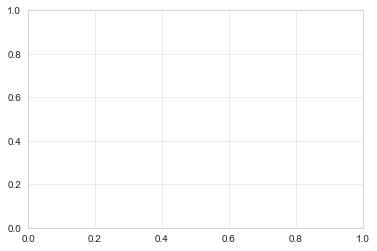

In [115]:
#create sample deciles

charts.deciles_chart(
        df_lithium_per1000,
        period_column='month',
        column='items_per_1000',
        title="Number of lithium items per CCG per 1000 patient",
        ylabel='Items per 1000',
        show_outer_percentiles=True,
        show_legend=False,
)


plt.show()

### Describe lithium items prescribed by non-GP facilities in UK

In [98]:
sql3 = """
WITH
bnf_tab AS (
SELECT
DISTINCT chemical,
chemical_code
FROM
ebmdatalab.hscic.bnf )
SELECT
rx.month,
rx.practice,
rx.pct,
SUBSTR(rx.bnf_code,1,9) AS chemical_code,
chemical,
sum(IF(rx.bnf_code LIKE "0402030K0%", items,0)) AS carbonate,
sum(IF(rx.bnf_code LIKE "0402030P0%", items,0)) AS citrate,
sum(items) AS total_lithium,
sum(actual_cost) AS total_cost
FROM
hscic.normalised_prescribing_standard AS rx
LEFT JOIN
bnf_tab
ON
chemical_code =SUBSTR(rx.bnf_code,1,9)
JOIN
hscic.practices AS prac
ON
rx.practice = prac.code 
JOIN
  hscic.ccgs AS ccgs
ON
rx.pct=ccgs.code
WHERE
  prac.setting !=4
  AND (bnf_code LIKE "0402030K0%" OR ##carbonate
  bnf_code LIKE "0402030P0%") ##citrate
  AND
ccgs.org_type='CCG'
GROUP BY
rx.month,
rx.practice,
rx.pct,
chemical_code,
chemical
ORDER BY
month"""

df_nonGPlithium = bq.cached_read(sql, csv_path='nonGPlithium.csv')

Downloading: 100%|██████████| 806011/806011 [01:12<00:00, 11104.36rows/s]


In [100]:
df_nonGPlithium['month'] = df_nonGPlithium['month'].astype('datetime64[ns]')
df_nonGPlithium.head()

,month,practice,pct,chemical_code,chemical,carbonate,citrate,total_lithium,total_cost
0,2010-08-01,E83027,07M,0402030K0,Lithium Carbonate,11,0,11,13.55
1,2010-08-01,M85007,15E,0402030K0,Lithium Carbonate,9,0,9,8.07
2,2010-08-01,K82037,14Y,0402030K0,Lithium Carbonate,18,0,18,17.85
3,2010-08-01,P89026,01Y,0402030K0,Lithium Carbonate,18,0,18,12.97
4,2010-08-01,C82055,03W,0402030K0,Lithium Carbonate,12,0,12,18.98


In [101]:
df_nonGPlithium.nunique()

month               110
practice           8022
pct                 191
chemical_code         2
chemical              2
carbonate           136
citrate              35
total_lithium       135
total_cost       195064
dtype: int64

In [95]:
headers = [
    'code','name','postcode','status_code','ccg','setting']
nonGPbreakdown = pd.read_csv("lithium.csv", names=headers, usecols=[0,1,9,12,23,25])
nonGPbreakdown.head()

,code,name,postcode,status_code,ccg,setting
0,month,practice,NaN,NaN,NaN,NaN
1,2010-08-01 00:00:00+00:00,E83027,NaN,NaN,NaN,NaN
2,2010-08-01 00:00:00+00:00,M85007,NaN,NaN,NaN,NaN
3,2010-08-01 00:00:00+00:00,K82037,NaN,NaN,NaN,NaN
4,2010-08-01 00:00:00+00:00,P89026,NaN,NaN,NaN,NaN


In [120]:
type(plot1)

matplotlib.axes._subplots.AxesSubplot